In [1]:
# Import Tensorflow for the bidirectional LSTM 
import tensorflow as tf
#from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras import Input
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Bidirectional, TimeDistributed, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt 
import numpy as np 

%matplotlib inline 
plt.style.use('ggplot')

# Readers for the conll format  
from nltk.corpus.reader import *
from nltk import flatten 

# Read the dataset 
train = ConllCorpusReader('../../Datasets/re3d-defense/CONLL-format/data/train/',
                          're3d-train.conll',
                          ['words', 'pos', 'chunk'])


test = ConllCorpusReader('../../Datasets/re3d-defense/CONLL-format/data/test/', 
                         're3d-test.conll',
                          ['words', 'pos', 'chunk'])



In [2]:
sentences = train.tagged_sents() + test.tagged_sents()
test_sentences = test.tagged_sents() 

print("Number of training records: " + str(len(sentences)))
print("Number of testing records: " + str(len(test.tagged_sents())))
print(sentences[1])

Number of training records: 965
Number of testing records: 200
[('The', 'B-Location'), ('hospital', 'I-Location'), ('has', 'O'), ('facilities', 'O'), ('for', 'O'), ('MRI', 'O'), ('and', 'O'), ('CT', 'O'), ('scan', 'O'), (',', 'O'), ('a', 'O'), ('gamma', 'O'), ('camera', 'O'), ('and', 'O'), ('lithotripsy', 'O'), ('device', 'O'), ('.', 'O')]


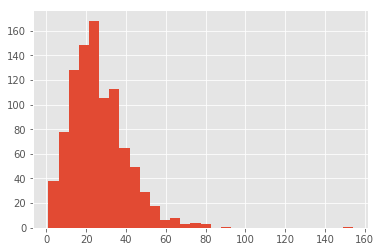

In [3]:
plt.hist([len(s) for s in sentences], bins=30)
plt.show()


In [4]:
# Max 
MAX_LENGTH = max([len(s) for s in sentences])
print("Max Length: " + str(MAX_LENGTH))

words = list(set(train.words() + test.words()))
words.append("ENDPAD")
N_WORDS = len(words) 

print("Number of words: " + str(N_WORDS))


tags = list(set(flatten([[tpl[1] for tpl in rec] for rec in sentences])))
N_TAGS = len(tags)

word_index = { w: i for i,w in enumerate(words) }
tag_index  = { t: i for i,t in enumerate(tags)  }

# from collections import Counter 
# o_count = Counter(flatten([[tpl[1] for tpl in rec] for rec in sentences])); 
# print(o_count)

X =[[word_index[word[0]] for word in sentence] for sentence in sentences]

X_TRAIN = pad_sequences(maxlen=MAX_LENGTH, 
                        sequences=X,
                        padding="post", value=N_WORDS-1)

Y =[[tag_index[word[1]] for word in sentence] for sentence in sentences]


Y_TRAIN = pad_sequences(maxlen=MAX_LENGTH, 
                        sequences=Y,
                        padding="post", value=tag_index['O'])

Y_TRAIN = [to_categorical(i, num_classes=N_TAGS) for i in Y_TRAIN]


from sklearn.model_selection import train_test_split
X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(X_TRAIN,Y_TRAIN, test_size=0.2)

# X_TEST = [ [word_index[word[0]] for word in sentence] for sentence in test_sentences]

# X_TEST = pad_sequences(maxlen=MAX_LENGTH, 
#                         sequences=X_TEST,
#                         padding="post", value=N_WORDS-1)

# #Y_TEST =[[tag_index[word[1]] for word in sentence] for sentence in sentences]

# Y_TEST = pad_sequences(maxlen=MAX_LENGTH, 
#                         sequences=Y_TEST,
#                         padding="post", value=tag_index['O'])

# Y_TEST = [to_categorical(i, num_classes=N_TAGS) for i in Y_TEST]



Max Length: 154
Number of words: 4295


In [5]:
input = Input(shape=(MAX_LENGTH,))
model = Embedding(input_dim=N_WORDS, output_dim=N_TAGS, input_length=MAX_LENGTH)(input)
model = Dropout(0.1)(model) 
model = Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.1))(model)
out   = TimeDistributed(Dense(N_TAGS, activation='softmax'))(model)

model = Model(input, out)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])
model.fit(X_TRAIN, np.array(Y_TRAIN), batch_size=32, epochs=300, validation_split=0.2, verbose =1)


C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\gradients_impl.py:108: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 617 samples, validate on 155 samples
Epoch 1/300
617/617 [==============================] - 7s 12ms/step - loss: 1.8179 - acc: 0.8985 - val_loss: 0.3770 - val_acc: 0.9507
Epoch 2/300
617/617 [==============================] - 5s 7ms/step - loss: 0.3664 - acc: 0.9477 - val_loss: 0.2817 - val_acc: 0.9507
Epoch 3/300
617/617 [==============================] - 5s 7ms/step - loss: 0.2864 - acc: 0.9477 - val_loss: 0.2573 - val_acc: 0.9507
Epoch 4/300
617/617 [==============================] - 5s 8ms/step - loss: 0.2516 - acc: 0.9477 - val_loss: 0.2386 - val_acc: 0.9507
Epoch 5/300
617/617 [==============================] - 5s 8ms/step - loss: 0.2367 - acc: 0.9477 - val_loss: 0.2294 - val_acc: 0.9507
Epoch 6/300
617/617 [==============================] - 5s 7ms/step - loss: 0.2312 - acc: 0.9477 - val_loss: 0.2347 - val_acc: 0.9507
Epoch 7/300
617/617 [==============================] - 5s 8ms/step - loss: 0.2265 - acc: 0.9477 - val_loss: 0.2327 - val_acc: 0.9507
Epoch 8/300
617/617 [=

Epoch 62/300
617/617 [==============================] - 5s 7ms/step - loss: 0.0587 - acc: 0.9837 - val_loss: 0.1914 - val_acc: 0.9652
Epoch 63/300
617/617 [==============================] - 5s 8ms/step - loss: 0.0575 - acc: 0.9841 - val_loss: 0.1940 - val_acc: 0.9647
Epoch 64/300
617/617 [==============================] - 5s 8ms/step - loss: 0.0553 - acc: 0.9847 - val_loss: 0.1982 - val_acc: 0.9648
Epoch 65/300
617/617 [==============================] - 5s 7ms/step - loss: 0.0538 - acc: 0.9850 - val_loss: 0.1948 - val_acc: 0.9648
Epoch 66/300
617/617 [==============================] - 5s 8ms/step - loss: 0.0517 - acc: 0.9853 - val_loss: 0.2062 - val_acc: 0.9652
Epoch 67/300
617/617 [==============================] - 5s 8ms/step - loss: 0.0495 - acc: 0.9864 - val_loss: 0.1990 - val_acc: 0.9654
Epoch 68/300
617/617 [==============================] - 5s 8ms/step - loss: 0.0478 - acc: 0.9868 - val_loss: 0.2016 - val_acc: 0.9655
Epoch 69/300
617/617 [==============================] - 5s 8ms

Epoch 123/300
617/617 [==============================] - 5s 8ms/step - loss: 0.0128 - acc: 0.9964 - val_loss: 0.2375 - val_acc: 0.9668
Epoch 124/300
617/617 [==============================] - 5s 8ms/step - loss: 0.0118 - acc: 0.9966 - val_loss: 0.2410 - val_acc: 0.9667
Epoch 125/300
617/617 [==============================] - 5s 8ms/step - loss: 0.0124 - acc: 0.9967 - val_loss: 0.2372 - val_acc: 0.9660
Epoch 126/300
617/617 [==============================] - 5s 8ms/step - loss: 0.0123 - acc: 0.9967 - val_loss: 0.2392 - val_acc: 0.9666
Epoch 127/300
617/617 [==============================] - 5s 8ms/step - loss: 0.0116 - acc: 0.9969 - val_loss: 0.2447 - val_acc: 0.9671
Epoch 128/300
617/617 [==============================] - 5s 8ms/step - loss: 0.0119 - acc: 0.9966 - val_loss: 0.2455 - val_acc: 0.9662
Epoch 129/300
617/617 [==============================] - 6s 10ms/step - loss: 0.0117 - acc: 0.9966 - val_loss: 0.2361 - val_acc: 0.9657
Epoch 130/300
617/617 [==============================]

617/617 [==============================] - 5s 8ms/step - loss: 0.0060 - acc: 0.9983 - val_loss: 0.2603 - val_acc: 0.9668
Epoch 184/300
617/617 [==============================] - 5s 8ms/step - loss: 0.0053 - acc: 0.9986 - val_loss: 0.2596 - val_acc: 0.9673
Epoch 185/300
617/617 [==============================] - 5s 9ms/step - loss: 0.0056 - acc: 0.9984 - val_loss: 0.2583 - val_acc: 0.9664
Epoch 186/300
617/617 [==============================] - 5s 9ms/step - loss: 0.0058 - acc: 0.9984 - val_loss: 0.2580 - val_acc: 0.9674
Epoch 187/300
617/617 [==============================] - 5s 9ms/step - loss: 0.0054 - acc: 0.9986 - val_loss: 0.2595 - val_acc: 0.9661
Epoch 188/300
617/617 [==============================] - 5s 8ms/step - loss: 0.0056 - acc: 0.9986 - val_loss: 0.2599 - val_acc: 0.9668
Epoch 189/300
617/617 [==============================] - 5s 8ms/step - loss: 0.0058 - acc: 0.9984 - val_loss: 0.2597 - val_acc: 0.9661
Epoch 190/300
617/617 [==============================] - 6s 9ms/step 

Epoch 244/300
617/617 [==============================] - 5s 8ms/step - loss: 0.0038 - acc: 0.9989 - val_loss: 0.2715 - val_acc: 0.9669
Epoch 245/300
617/617 [==============================] - 5s 8ms/step - loss: 0.0039 - acc: 0.9989 - val_loss: 0.2703 - val_acc: 0.9668
Epoch 246/300
617/617 [==============================] - 5s 8ms/step - loss: 0.0035 - acc: 0.9989 - val_loss: 0.2720 - val_acc: 0.9669
Epoch 247/300
617/617 [==============================] - 5s 8ms/step - loss: 0.0037 - acc: 0.9990 - val_loss: 0.2768 - val_acc: 0.9672
Epoch 248/300
617/617 [==============================] - 5s 8ms/step - loss: 0.0037 - acc: 0.9989 - val_loss: 0.2751 - val_acc: 0.9670
Epoch 249/300
617/617 [==============================] - 5s 8ms/step - loss: 0.0033 - acc: 0.9991 - val_loss: 0.2725 - val_acc: 0.9672
Epoch 250/300
617/617 [==============================] - 5s 8ms/step - loss: 0.0035 - acc: 0.9989 - val_loss: 0.2717 - val_acc: 0.9669
Epoch 251/300
617/617 [==============================] 

In [6]:
i = 6
p = model.predict(np.array([X_TEST[i]]))
p = np.argmax(p, axis=-1)

print("{:14} ({:5}): {}".format("Word", "True", "Pred"))
for w,pred in zip(X_TEST[i],p[0]):
    print("{:14}: {}".format(words[w],tags[pred]))
    
#print(len(X_TRAIN[36]))
#print(words[X_TRAIN[4][1]])

model.save('inital.model')

Word           (True ): Pred
We            : B-Organisation
believe       : O
his           : B-Organisation
presence      : O
in            : O
the           : B-Location
country       : I-Location
is            : O
among         : O
the           : O
most          : O
effective     : O
ways          : O
to            : O
send          : O
the           : O
message       : O
that          : O
the           : B-Organisation
United        : I-Organisation
States        : I-Organisation
stands        : O
with          : O
the           : B-Organisation
people        : I-Organisation
of            : O
Syria         : I-Location
.             : O
ENDPAD        : O
ENDPAD        : O
ENDPAD        : O
ENDPAD        : O
ENDPAD        : O
ENDPAD        : O
ENDPAD        : O
ENDPAD        : O
ENDPAD        : O
ENDPAD        : O
ENDPAD        : O
ENDPAD        : O
ENDPAD        : O
ENDPAD        : O
ENDPAD        : O
ENDPAD        : O
ENDPAD        : O
ENDPAD        : O
ENDPAD        : O
ENDPAD 